<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_cartpole.ipynb" 
   target="_parent">
   <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Colab a Jupyter Notebook

In [1]:
1+1

2

Hello I am a text: 1+1

In [2]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


Image

## Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, prepare matplotlib, if in colab: load additional packages for rendering

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get update >/dev/null
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [4]:
import sys
if 'google.colab' in sys.modules:
    !pip install easyagents >/dev/null

# Our Goal

## Step 1: Play the Game

In [2]:
import gym

env = gym.make("CartPole-v1")

In [3]:
env.reset()

array([0.0005404 , 0.04445554, 0.00460142, 0.03311159])

In [4]:
env.step(1)

(array([ 0.00142951,  0.2395112 ,  0.00526365, -0.258116  ]), 1.0, False, {})

In [5]:
env.action_space.n

2

In [6]:
env.observation_space.shape[0]

4

In [7]:
done = False
rewards = 0
env.reset()

array([ 0.01546896, -0.01414844, -0.03762043,  0.01111907])

In [8]:
(observation,reward,done,info)=env.step(1)
rewards += reward
print( "rewards=", rewards, "observation=", observation )
if done:
  print( "--- game over ---" )

rewards= 1.0 observation= [ 0.01518599  0.18149228 -0.03739805 -0.29319217]


In [9]:
from random import randint

done = False
rewards = 0
env.reset()
while not done:
  action = randint(0,1)
  (observation,reward,done,info)=env.step(action)
  rewards += reward
  print( "action=", action, "rewards=", rewards, "observation=", observation )
print( "--- game over ---" )

action= 0 rewards= 1.0 observation= [-0.01822824 -0.20942213  0.01960397  0.34460573]
action= 0 rewards= 2.0 observation= [-0.02241668 -0.40481739  0.02649608  0.64340551]
action= 1 rewards= 3.0 observation= [-0.03051303 -0.21007456  0.03936419  0.35918272]
action= 0 rewards= 4.0 observation= [-0.03471452 -0.40573334  0.04654785  0.66401363]
action= 1 rewards= 5.0 observation= [-0.04282919 -0.21128878  0.05982812  0.38634283]
action= 1 rewards= 6.0 observation= [-0.04705497 -0.0170649   0.06755497  0.11310724]
action= 0 rewards= 7.0 observation= [-0.04739626 -0.21308655  0.06981712  0.42631509]
action= 0 rewards= 8.0 observation= [-0.05165799 -0.40912435  0.07834342  0.74016497]
action= 1 rewards= 9.0 observation= [-0.05984048 -0.21516647  0.09314672  0.47312993]
action= 0 rewards= 10.0 observation= [-0.06414381 -0.41147199  0.10260932  0.79365728]
action= 0 rewards= 11.0 observation= [-0.07237325 -0.6078415   0.11848246  1.11677651]
action= 0 rewards= 12.0 observation= [-0.08453008 -0

# Choose your Weapons

In [10]:
env.reset()
env.step(1)

(array([ 0.04344618,  0.16378308, -0.03768101, -0.33757563]), 1.0, False, {})

In [11]:
env.action_space.n

2

In [12]:
from easyagents.agents import PpoAgent, DqnAgent
from easyagents.callbacks import plot, duration

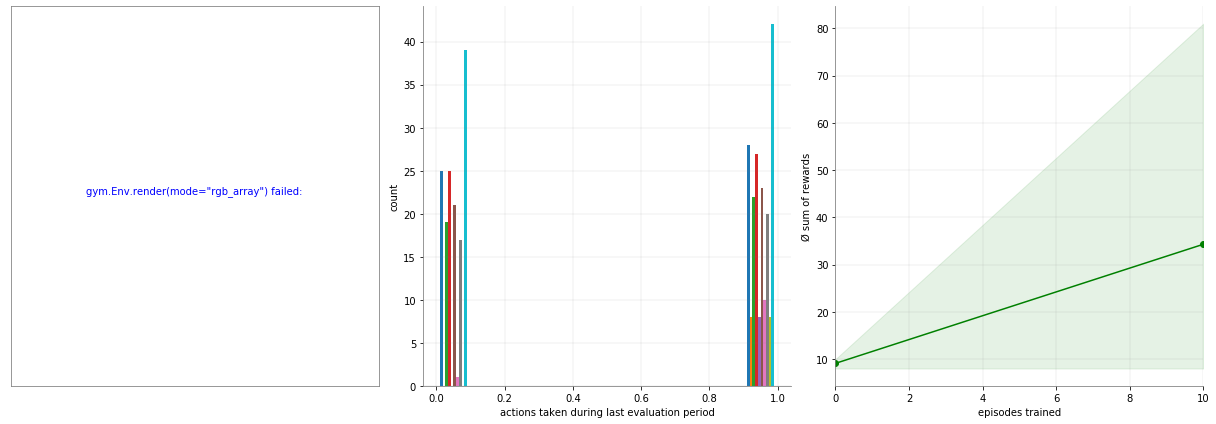

KeyboardInterrupt: ignored

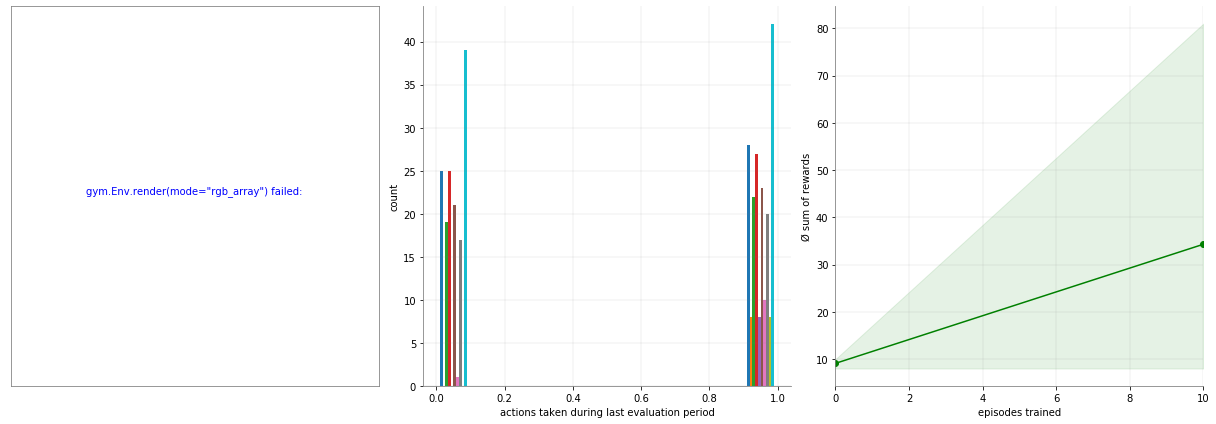

In [13]:
ppoAgent = PpoAgent('CartPole-v0')
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

In [ ]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(10000,10000,10000))
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/easyagents/callbacks/plot.py:264: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  self.axes.set_xlim(xlim)


In [4]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot, duration

KeyboardInterrupt: ignored

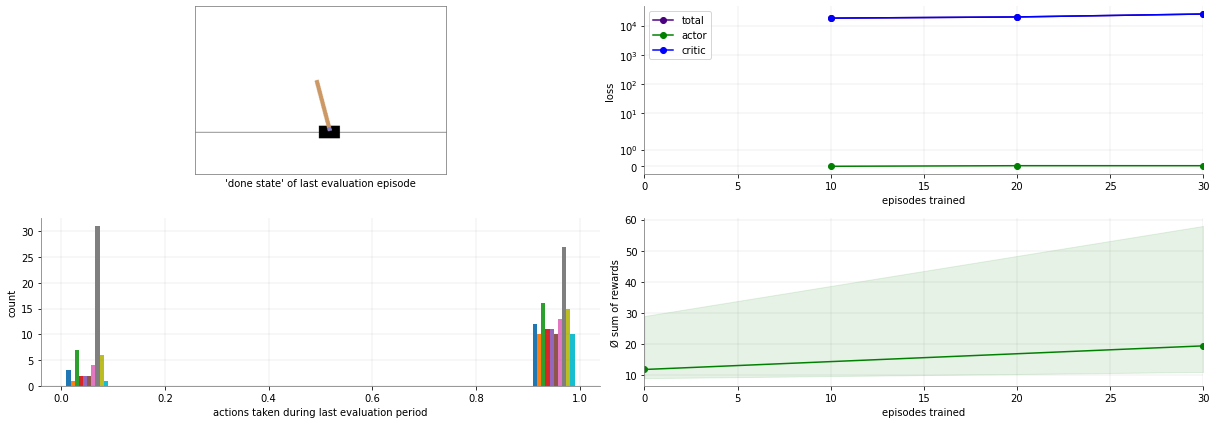

In [5]:
%%time

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100, 50, 25))
ppoAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()],
               num_iterations=10, num_iterations_between_eval=3)


In [ ]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

In [ ]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)